### Домашнє завдання: Кластеризація в Аналізі Персоналій Клієнтів

#### Контекст
В цьому ДЗ ми скористаємось алгоритмами кластеризації для задачі аналізу портретів клієнтів (Customer Personality Analysis).

Customer Personality Analysis - це аналіз різних сегментів клієнтів компанії. Цей аналіз дозволяє бізнесу краще розуміти своїх клієнтів і полегшує процес адаптації продуктів під конкретні потреби, поведінку та інтереси різних типів клієнтів.

Аналіз портретів клієнтів допомагає бізнесу змінювати свій продукт на основі цільової аудиторії, розділеної на різні сегменти. Наприклад, замість того, щоб витрачати гроші на маркетинг нового продукту для всіх клієнтів у базі даних компанії, бізнес може проаналізувати, який сегмент клієнтів найімовірніше придбає продукт, і потім зосередити маркетингові зусилля лише на цьому сегменті.

#### Завдання
На основі наданих даних в файлі `marketing_campaign.csv` потрібно виконати кластеризацію, щоб виявити сегменти клієнтів.

#### Вхідні дані
Вам надано набір даних з такими атрибутами:

**Характеристики користувачів:**
- `ID`: Унікальний ідентифікатор клієнта
- `Year_Birth`: Рік народження клієнта
- `Education`: Рівень освіти клієнта
- `Marital_Status`: Сімейний стан клієнта
- `Income`: Річний дохід домогосподарства клієнта
- `Kidhome`: Кількість дітей у домогосподарстві клієнта
- `Teenhome`: Кількість підлітків у домогосподарстві клієнта
- `Dt_Customer`: Дата реєстрації клієнта у компанії
- `Recency`: Кількість днів з моменту останньої покупки клієнта
- `Complain`: 1, якщо клієнт скаржився за останні 2 роки, 0 - якщо ні

**Продукти:**
- `MntWines`: Сума, витрачена на вино за останні 2 роки
- `MntFruits`: Сума, витрачена на фрукти за останні 2 роки
- `MntMeatProducts`: Сума, витрачена на м'ясні продукти за останні 2 роки
- `MntFishProducts`: Сума, витрачена на рибні продукти за останні 2 роки
- `MntSweetProducts`: Сума, витрачена на солодощі за останні 2 роки
- `MntGoldProds`: Сума, витрачена на золото за останні 2 роки

**Акції:**
- `NumDealsPurchases`: Кількість покупок, зроблених з використанням знижок
- `AcceptedCmp1`: 1, якщо клієнт прийняв пропозицію у першій кампанії, 0 - якщо ні
- `AcceptedCmp2`: 1, якщо клієнт прийняв пропозицію у другій кампанії, 0 - якщо ні
- `AcceptedCmp3`: 1, якщо клієнт прийняв пропозицію у третій кампанії, 0 - якщо ні
- `AcceptedCmp4`: 1, якщо клієнт прийняв пропозицію у четвертій кампанії, 0 - якщо ні
- `AcceptedCmp5`: 1, якщо клієнт прийняв пропозицію у п'ятій кампанії, 0 - якщо ні
- `Response`: 1, якщо клієнт прийняв пропозицію в останній кампанії, 0 - якщо ні

**Взаємодія з компанією:**
- `NumWebPurchases`: Кількість покупок, зроблених через вебсайт компанії
- `NumCatalogPurchases`: Кількість покупок, зроблених за каталогом
- `NumStorePurchases`: Кількість покупок, зроблених безпосередньо у магазинах
- `NumWebVisitsMonth`: Кількість відвідувань вебсайту компанії за останній місяць


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

import seaborn as sns
from sklearn import metrics
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN


from scipy.cluster.hierarchy import dendrogram, linkage, fcluster


**Завдання 1**. Завантажте дані з `marketing_campaign.csv` в Pandas dataframe і виведіть основну інформацію про дані: скільки всього рядків і колонок, які типи даних мають колонки, скільки пропущених значень.

In [2]:
data = pd.read_csv('marketing_campaign.csv', delimiter='\t')
df = pd.DataFrame(data)
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [4]:
null_count = df.isnull().sum()
null_count


ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [5]:

null_percentage = round((df['Income'].isnull().sum()/df.shape[0])*100, 2)
null_percentage


1.07

In [6]:
category_col = df.select_dtypes(include ='object').columns.to_list()
category_col

['Education', 'Marital_Status', 'Dt_Customer']

In [7]:
df.Dt_Customer

0       04-09-2012
1       08-03-2014
2       21-08-2013
3       10-02-2014
4       19-01-2014
           ...    
2235    13-06-2013
2236    10-06-2014
2237    25-01-2014
2238    24-01-2014
2239    15-10-2012
Name: Dt_Customer, Length: 2240, dtype: object

Ми маємо дата фрейм на 29 колонок, в основному з числовими даними і 3 колонками категорійних даних(одна колонка з датами). Пусті значення маємо тільки в колонці річного доходу для 24 ліній.

**Завдання 2.** Заповніть пропущені значення з врахуванням того завдання (кластеризація), яке ми виконуємо. Поясніть свій вибір заповнення пропущених значень.

Кількість пропущених значень дуже маленька відносно всього дата фрейму, ми можемо видалити ці лінії, заповнити на NA, чи поставити тереднє, тож перше проаналізуємо, що це за дані і приймемо рішення.

In [8]:
null_df = df[df.Income.isnull()]
null_df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
10,1994,1983,Graduation,Married,NaN,1,0,15-11-2013,11,5,...,7,0,0,0,0,0,0,3,11,0
27,5255,1986,Graduation,Single,NaN,1,0,20-02-2013,19,5,...,1,0,0,0,0,0,0,3,11,0
43,7281,1959,PhD,Single,NaN,0,0,05-11-2013,80,81,...,2,0,0,0,0,0,0,3,11,0
48,7244,1951,Graduation,Single,NaN,2,1,01-01-2014,96,48,...,6,0,0,0,0,0,0,3,11,0
58,8557,1982,Graduation,Single,NaN,1,0,17-06-2013,57,11,...,6,0,0,0,0,0,0,3,11,0
71,10629,1973,2n Cycle,Married,NaN,1,0,14-09-2012,25,25,...,8,0,0,0,0,0,0,3,11,0
90,8996,1957,PhD,Married,NaN,2,1,19-11-2012,4,230,...,9,0,0,0,0,0,0,3,11,0
91,9235,1957,Graduation,Single,NaN,1,1,27-05-2014,45,7,...,7,0,0,0,0,0,0,3,11,0
92,5798,1973,Master,Together,NaN,0,0,23-11-2013,87,445,...,1,0,0,0,0,0,0,3,11,0
128,8268,1961,PhD,Married,NaN,0,1,11-07-2013,23,352,...,6,0,0,0,0,0,0,3,11,0


In [9]:
df.Income.quantile(q = [0.25,0.5,0.75,1])

0.25     35303.0
0.50     51381.5
0.75     68522.0
1.00    666666.0
Name: Income, dtype: float64

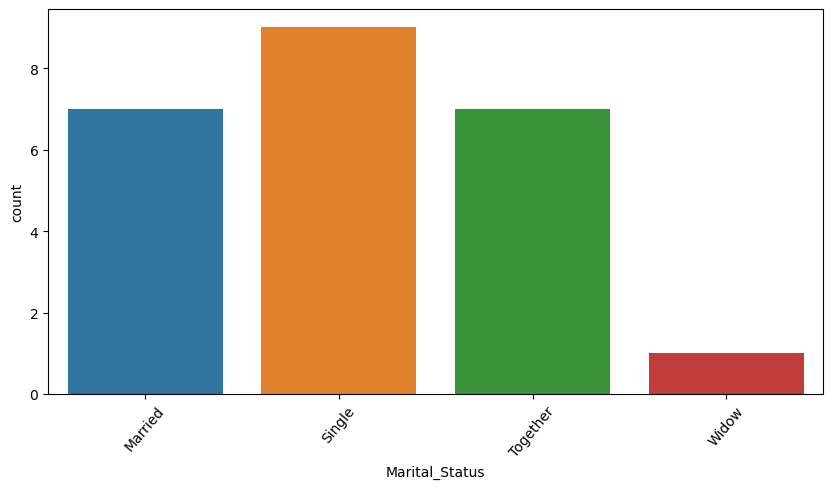

In [10]:
plt.figure(figsize = (10,5))
sns.countplot(data = null_df, x = "Marital_Status")
plt.xticks(rotation = 50)
plt.show()

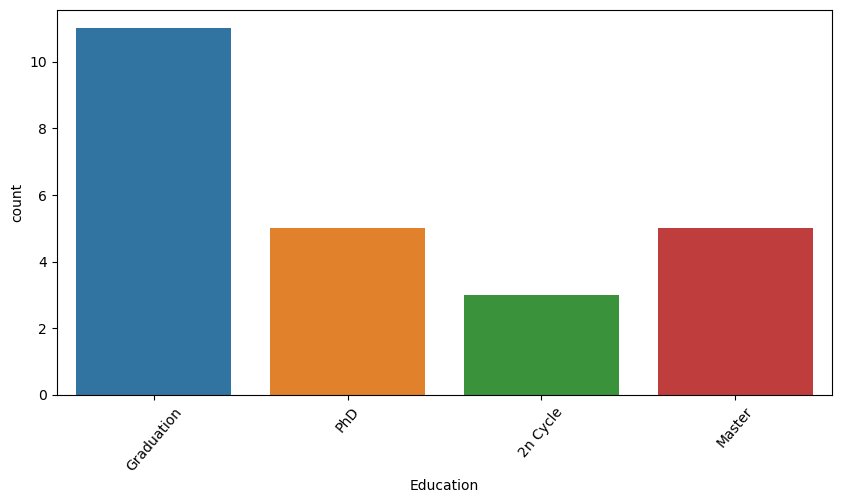

In [11]:
plt.figure(figsize = (10,5))
sns.countplot(data = null_df, x = "Education")
plt.xticks(rotation = 50)
plt.show()

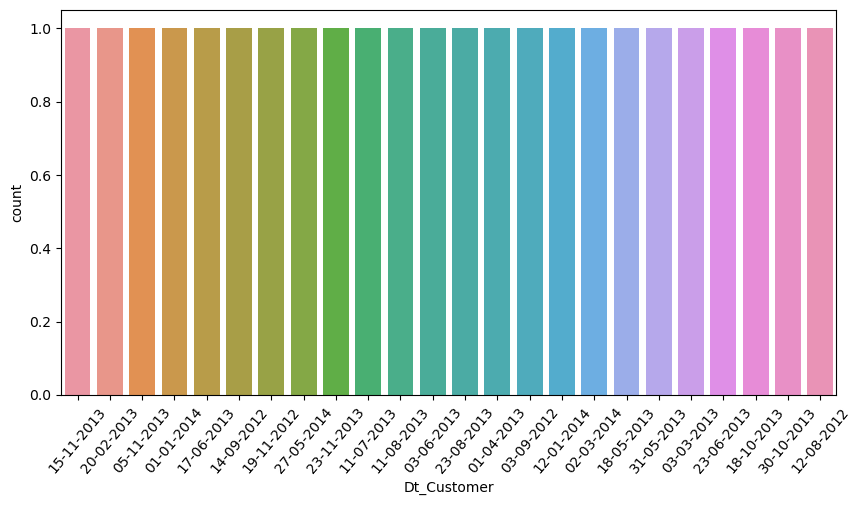

In [12]:
plt.figure(figsize = (10,5))
sns.countplot(data = null_df, x = "Dt_Customer")
plt.xticks(rotation = 50)
plt.show()

Явних ознак до якої категорії віднести ці записи не бачу, так як ціль зрозуміти портрет поведінки клієнтів можна видалю ці записи, так як вони не мають вплинути на рішення додо якоїсь з категорій 

In [13]:
df = df.dropna()

**Завдання 3.** У нас є декілька колонок з категоріальними значеннями та одна колонка з датою. Як би ви обробили ці колонки для того, аби передати їх в алгоритм кластеризації?

Реалізуйте обробку категоріальних колонок і колонки з датою та перетворіть їх на ознаки, корисні для кластеризації з вашого погляду.

категоріальні колонки закодуємо one-hot-encoder колонку дати переведемо в правельний формат і погрупуємо за роком, місяцем, тижнем


In [14]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format="%d-%m-%Y")  # Конвертуємо в datetime
df['Year_Customer'] = df['Dt_Customer'].dt.year
df['Month_Customer'] = df['Dt_Customer'].dt.month
df['Day_Customer'] = df['Dt_Customer'].dt.day
df['Day_of_week_Customer'] = df['Dt_Customer'].dt.dayofweek  # 0 = понеділок, 6 = неділя

In [15]:
df.Education.value_counts()

Education
Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: count, dtype: int64

In [16]:
df.Marital_Status.value_counts()

Marital_Status
Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

In [17]:
encoder = OneHotEncoder(drop='first',sparse_output=False, handle_unknown='ignore')
encoder.fit(df[['Marital_Status','Education']])

OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)

In [18]:
encoded_cols = list(encoder.get_feature_names_out(['Marital_Status','Education']))
encoded_cols

['Marital_Status_Alone',
 'Marital_Status_Divorced',
 'Marital_Status_Married',
 'Marital_Status_Single',
 'Marital_Status_Together',
 'Marital_Status_Widow',
 'Marital_Status_YOLO',
 'Education_Basic',
 'Education_Graduation',
 'Education_Master',
 'Education_PhD']

In [19]:
df[encoded_cols] = encoder.transform(df[['Marital_Status', 'Education']])


In [20]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO,Education_Basic,Education_Graduation,Education_Master,Education_PhD
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [21]:
df = df.drop(columns=category_col)

Також маємо рік народдення який можемо перетворитив роки для зручності аналізу 

In [22]:
df['Age'] = 2024 - df['Year_Birth']

**Завдання 4**.
1. Запишіть в змінну X ті дані, які будете кластеризувати.
2. Побудуйте кластеризацію з KMeans на 3 кластери.
3. Обчисліть метрику силуету для цієї кластеризації.

In [23]:
# Спробую кластеризацію за всима ознаками 
X = df.copy()

In [24]:
kmeans = KMeans(n_clusters=3, n_init='auto', random_state=42)
kmeans.fit(X)

labels = kmeans.predict(X)
X['Cluster'] = kmeans.labels_

In [25]:
centroids = kmeans.cluster_centers_
s = metrics.silhouette_score(X, labels, metric='euclidean')
print(f'Silhouette Coefficient for the data Dataset Clusters: {s:.2f}')

Silhouette Coefficient for the data Dataset Clusters: 0.49


Оцінка не є показовою, значить, що ми 50 на 50 визначили кластери, тобто вони можуть перетинатись 

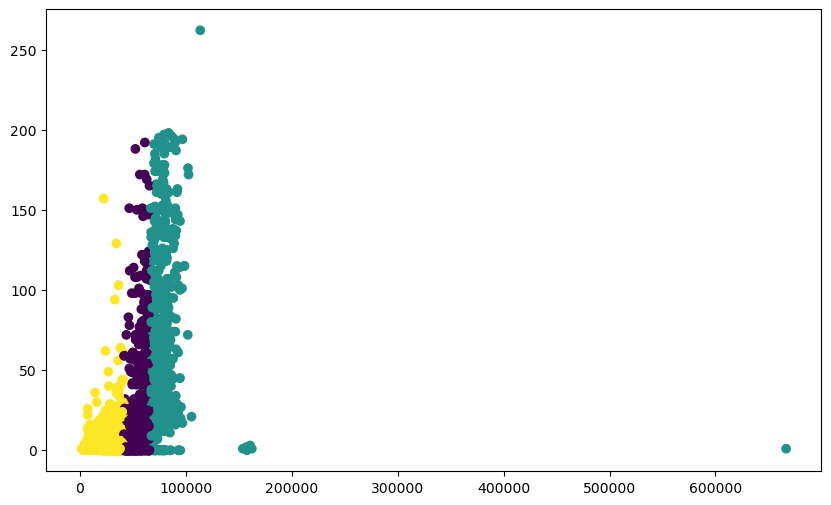

In [26]:
plt.figure(figsize=(10, 6))
plt.scatter(X['Income'], X['MntSweetProducts'],c=labels)
plt.show()

Хоча візуально вибравши доходи і одну категорію, отримали гарне розбиття на кластери, і бачу що чим більші доходи в клієнтів тим більше покупок солодощів. Для більш якіснішого аналізу можемо також виокремлю конкретні ознаки наприклад для аназізу клієнтів, які товари вони купують найчастіше і скільки витрачають на кожну категорію. 

Для початку приберемо викиди

In [27]:
X = X[(X['Income']<100000) & (X['Age']<80)]

Silhouette Coefficient for the data Dataset Clusters: 0.50


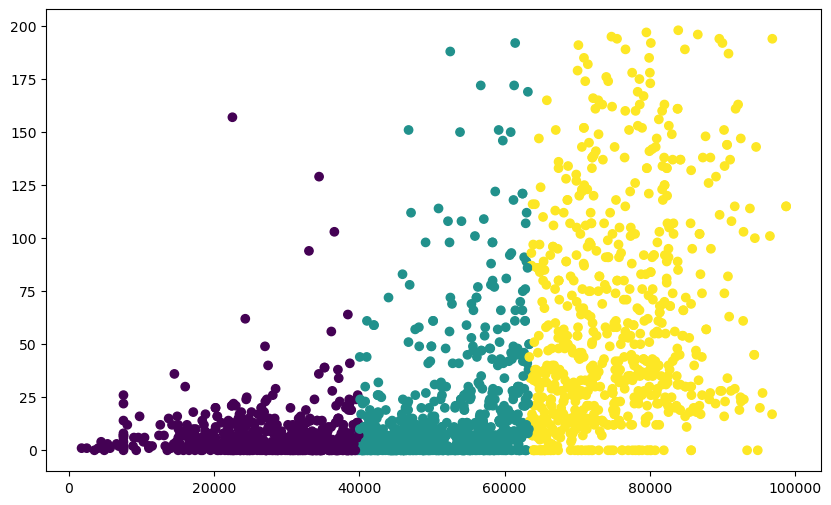

In [28]:
kmeans.fit(X)
labels = kmeans.predict(X)
X['Cluster'] = kmeans.labels_

centroids = kmeans.cluster_centers_
s = metrics.silhouette_score(X, labels, metric='euclidean')
print(f'Silhouette Coefficient for the data Dataset Clusters: {s:.2f}')

plt.figure(figsize=(10, 6))
plt.scatter(X['Income'], X['MntSweetProducts'],c=labels)
plt.show()

Покращили візуалізацію

- `MntWines`: Сума, витрачена на вино за останні 2 роки
- `MntFruits`: Сума, витрачена на фрукти за останні 2 роки
- `MntMeatProducts`: Сума, витрачена на м'ясні продукти за останні 2 роки
- `MntFishProducts`: Сума, витрачена на рибні продукти за останні 2 роки
- `MntSweetProducts`: Сума, витрачена на солодощі за останні 2 роки
- `MntGoldProds`: Сума, витрачена на золото за останні 2 роки

In [29]:
features = X[['Income', 'Age', 'MntWines', 'MntFruits', 'MntMeatProducts', 
                 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 
                 'NumDealsPurchases', 'NumWebPurchases', 
                 'NumCatalogPurchases', 'NumStorePurchases']]


In [30]:
kmeans = KMeans(n_clusters=3, n_init='auto', random_state=42)
kmeans.fit(features)

labels_2 = kmeans.predict(features)
X['Cluster_2'] = kmeans.labels_

centroids = kmeans.cluster_centers_
s_features = metrics.silhouette_score(features, labels_2, metric='euclidean')
print(f'Silhouette Coefficient for the data Dataset Clusters: {s_features:.2f}')

Silhouette Coefficient for the data Dataset Clusters: 0.55


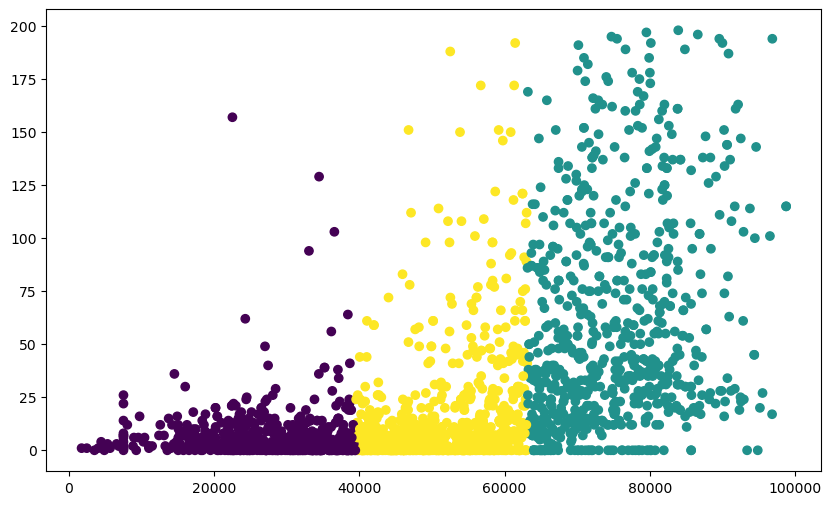

In [31]:
plt.figure(figsize=(10, 6))
plt.scatter(X['Income'], X['MntSweetProducts'],c=labels_2)
plt.show()

**Завдання 5.** Візуалізуйте знайдені кластери разом з наявними даними та проаналізуйте кластери. У нас ознак більше, ніж 2 або 3, тож, тут треба подумати, які саме ознаки варто використати для візуалізації аби вони були інформативними. Рекомендую точно звернути увагу на харакетиристики про дохід користувачів і те, як вони взаємодять з магазинок (кількість покупок і тд).

Для візуалізації зручно може бути використати `plotly.express.scatter_3d` для 3D графіку розсіювання, але тут можна скористатись будь-яким зрозумілим і зручним для вас методом візуалізації. Опишіть свої спостереження, чи кластери мають сенс?

спробую взяти інші умови для відображення

In [32]:
def d3_plot(x_p, y_p, z_p, claster_color):
    plt.figure(figsize=(10, 6))
    fig = px.scatter_3d(
    X,
    x=x_p,
    y=y_p,
    z=z_p,
    color=claster_color,
    title=f'Кластери клієнтів: {x_p.name}, {y_p.name} та {z_p.name}',
    labels={claster_color: 'Кластер'},
    hover_name='ID'  # Додати можливість побачити ID клієнта при наведенні
    )
    fig.show()

In [33]:
d3_plot(X['Income'], X['MntSweetProducts'], X['NumWebPurchases'],'Cluster_2')

<Figure size 1000x600 with 0 Axes>

In [34]:
d3_plot(X['Age'], X['MntGoldProds'], X['MntWines'],'Cluster_2')

<Figure size 1000x600 with 0 Axes>

In [35]:
d3_plot(X['Income'], X['MntWines'], X['MntMeatProducts'],'Cluster_2')

<Figure size 1000x600 with 0 Axes>

In [36]:
d3_plot(X['Income'], X['MntWines'], X['MntGoldProds'],'Cluster_2')

<Figure size 1000x600 with 0 Axes>

Якщо беремо розбиття по рокам картинка змішана , тобто схоже на те що немає залежності від років(не залежно яким способом і що саме було куплено), 
А от з доходами дуже гарно розділяє на класи 

**Завдання 6**. Масштабуйте дані і побудуйте знову кластеризацію KMeans на 3 кластери і обчисліть метрику силуету. Опишіть порівняння з експериментом без масштабування значень.

In [37]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [38]:
kmeans_scaled = KMeans(n_clusters=3, n_init='auto', random_state=42)
kmeans_scaled.fit(scaled_features)

labels_scaled = kmeans_scaled.predict(scaled_features)
X['Cluster_sc'] = kmeans_scaled.labels_

X['Cluster_sc'].value_counts()


Cluster_sc
0    994
1    610
2    581
Name: count, dtype: int64

In [39]:
centroids_sc = kmeans_scaled.cluster_centers_
s_scaled_features = metrics.silhouette_score(scaled_features, labels_scaled, metric='euclidean')
print(f'Silhouette Coefficient for the data Dataset Clusters: {s_scaled_features:.2f}')

Silhouette Coefficient for the data Dataset Clusters: 0.30


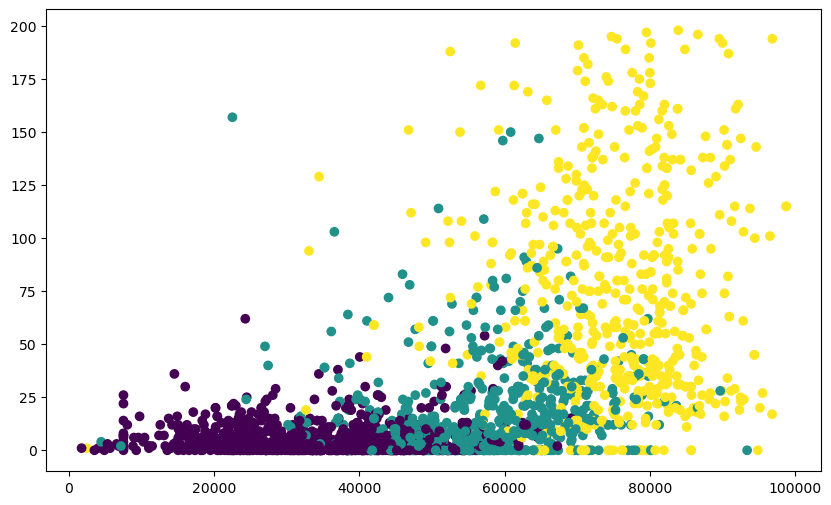

In [40]:
plt.figure(figsize=(10, 6))
plt.scatter(X['Income'], X['MntSweetProducts'],c=labels_scaled)
plt.show()

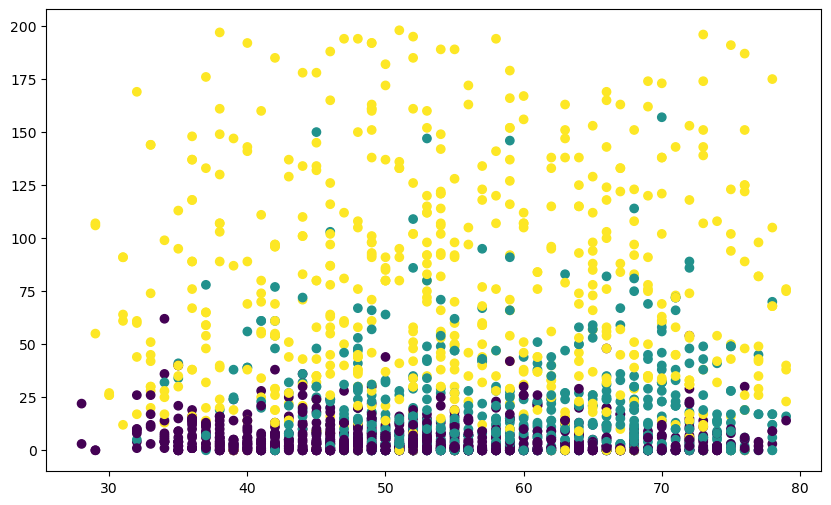

In [41]:
plt.figure(figsize=(10, 6))
plt.scatter(X['Age'], X['MntSweetProducts'],c=labels_scaled)
plt.show()

In [42]:
d3_plot(X['Income'], X['MntWines'], X['MntMeatProducts'], 'Cluster_sc')

<Figure size 1000x600 with 0 Axes>

Маштабування ознак погіршило ситуацію візуально, і тепер в нас не проглядаються чіткі кластери по доходам,
чи рокам, і групи стали ще більш змішані, що ми бачимо і по оцінці

**Завдання 7.** З візуалізацій на попередньому кроці ви могли побачити якісь викиди в даних. Опрацюйте викиди (можна видалити ці рядки або придумати інший спосіб).

Викиди опрацювала в попередньому завданні вилучивши значення з вибірки

**Завдання 8.** Виконайте Elbow method для пошуку оптимальної кількості кластерів та натренуйте KMeans з тою кількістю кластерів, яку Elbow method показав як оптимальну. Обчисліть метрику силуету. Візуалізуйте кластери. З яким набором даних (масштабованим чи ні) тут працювати - ваш вибір, можна зробити експеримент з обома.

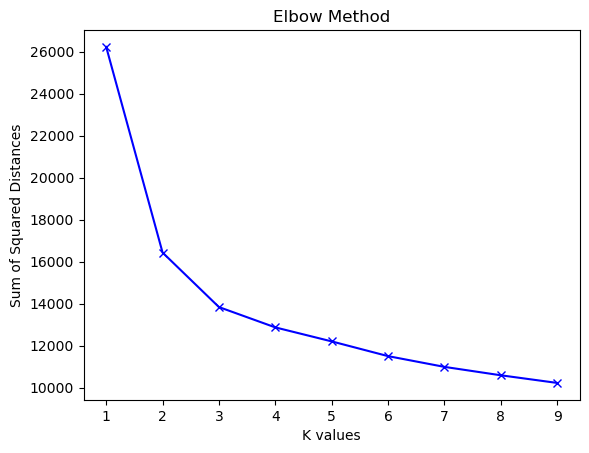

In [43]:
K = range(1,10)
sum_of_squared_distances = []

for k in K:
    model = KMeans(n_clusters=k, n_init='auto', random_state=42).fit(scaled_features)
    sum_of_squared_distances.append(model.inertia_)

plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('K values')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method')
plt.show()

По графіку можна сказати, що найкращий результат може бути з 3 кластерами, але для порівняння натренуємо 4

Silhouette Coefficient for the data Dataset Clusters: 0.27


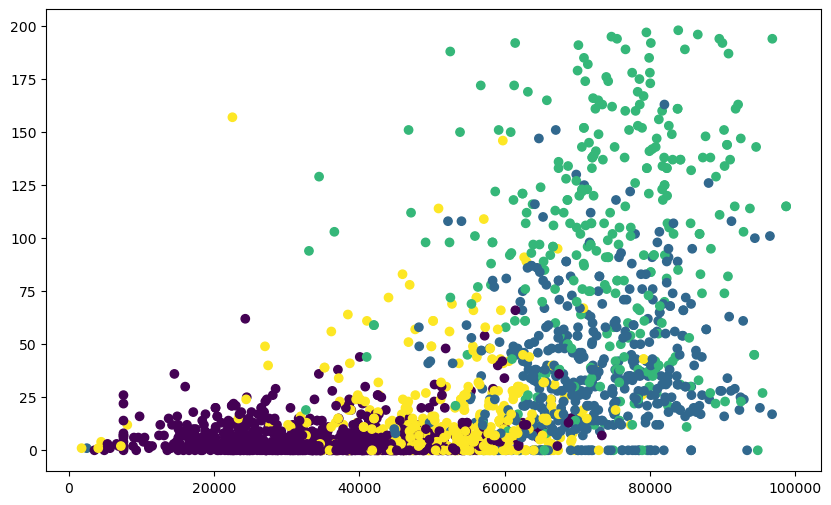

In [44]:
kmeans_scaled_2 = KMeans(n_clusters=4, n_init='auto',random_state=42)
kmeans_scaled_2.fit(scaled_features)

labels_scaled_2 = kmeans_scaled_2.predict(scaled_features)
X['Cluster_cs_2'] = kmeans_scaled_2.labels_

centroids_sc_2 = kmeans_scaled_2.cluster_centers_
s_scaled_features_2 = metrics.silhouette_score(scaled_features, labels_scaled_2, metric='euclidean')
print(f'Silhouette Coefficient for the data Dataset Clusters: {s_scaled_features_2:.2f}')

plt.figure(figsize=(10, 6))
plt.scatter(X['Income'], X['MntSweetProducts'],c=labels_scaled_2)
plt.show()


Результат став гірше ніж з 3 кластерами , спробуємо не маштабовані ознаки

Silhouette Coefficient for the data Dataset Clusters: 0.54


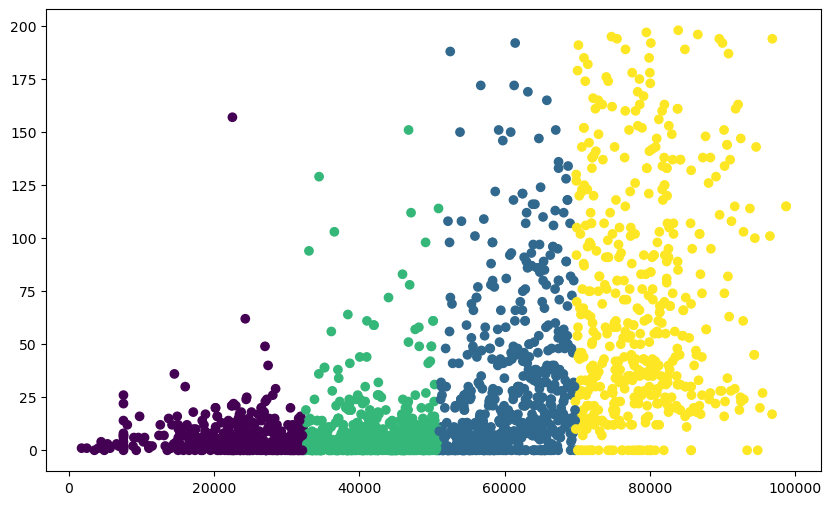

In [45]:
kmeans_3 = KMeans(n_clusters=4, n_init='auto',random_state=42)
kmeans_3.fit(features)

labels_3 = kmeans_3.predict(features)
X['Cluster_3'] = kmeans_3.labels_

centroids_3 = kmeans_3.cluster_centers_
s_features_3 = metrics.silhouette_score(features, labels_3, metric='euclidean')
print(f'Silhouette Coefficient for the data Dataset Clusters: {s_features_3:.2f}')

plt.figure(figsize=(10, 6))
plt.scatter(X['Income'], X['MntSweetProducts'],c=labels_3)
plt.show()


Отже в по результатам бачу що немаштабовані ознаки краще розпізнаються і в таеому випадку маємо схожу картину як з 3ма кластерами так і 4, можна беде обирати в залежності від задачі

**Завдання 9.** Використовуючи методи `scipy` `dendrogram, linkage, fcluster`
1. Побудуйте ієрархічну агломеративну кластеризацію з `single linkage` на даних невідмасштабованих, але з прибраним викидом.
2. Візуалізуйте дендрограму. При візуалізації обовʼязково задайте параметр `truncate_mode='lastp'` - це обріже дендрограму, без цього вона буде завелика, бо у нас тут даних суттєво більше, ніж в лекції.
3. Проаналізуйте дендрограму та побудуйте варіанти плоских кластеризацій з `fcluster` на 2 і 3 кластери. Візуалізуйте результати кожної з цих кластеризацій та зробіть висновок. Чи вважаєте ви якусь з цих кластеризацій вдалою? Що спостерігаєте з цих кластеризацій?
4. Порахуйте мерику силуету для цього методу кластеризації.

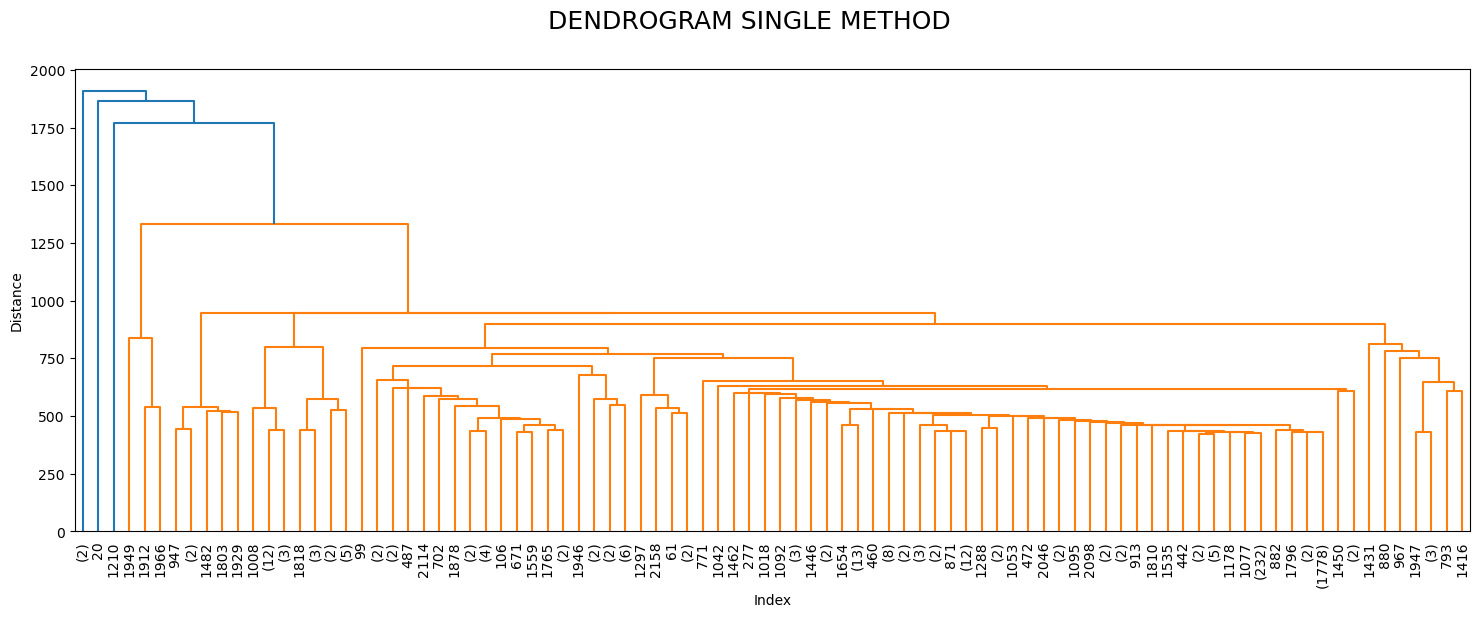

In [46]:
linked = linkage(features, method='single')


plt.figure(figsize=(18,6))
dendrogram(linked, truncate_mode='lastp', p=90, leaf_rotation=90, leaf_font_size=10)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("DENDROGRAM SINGLE METHOD",fontsize=18)
plt.show()


Бачу, що просліжується один великий кластер і невеличкі викиди які лишились, розібʼємо на 3 кластери за допомогою fcluster, і потім зроблю щераз прибравши ці три точки, але візуально здається що в нас постійно будуть викидами 3-4 точки 

In [47]:
X['2_clust'] = fcluster(linked, 2, criterion='maxclust')
X['3_clust'] = fcluster(linked, 3, criterion='maxclust')

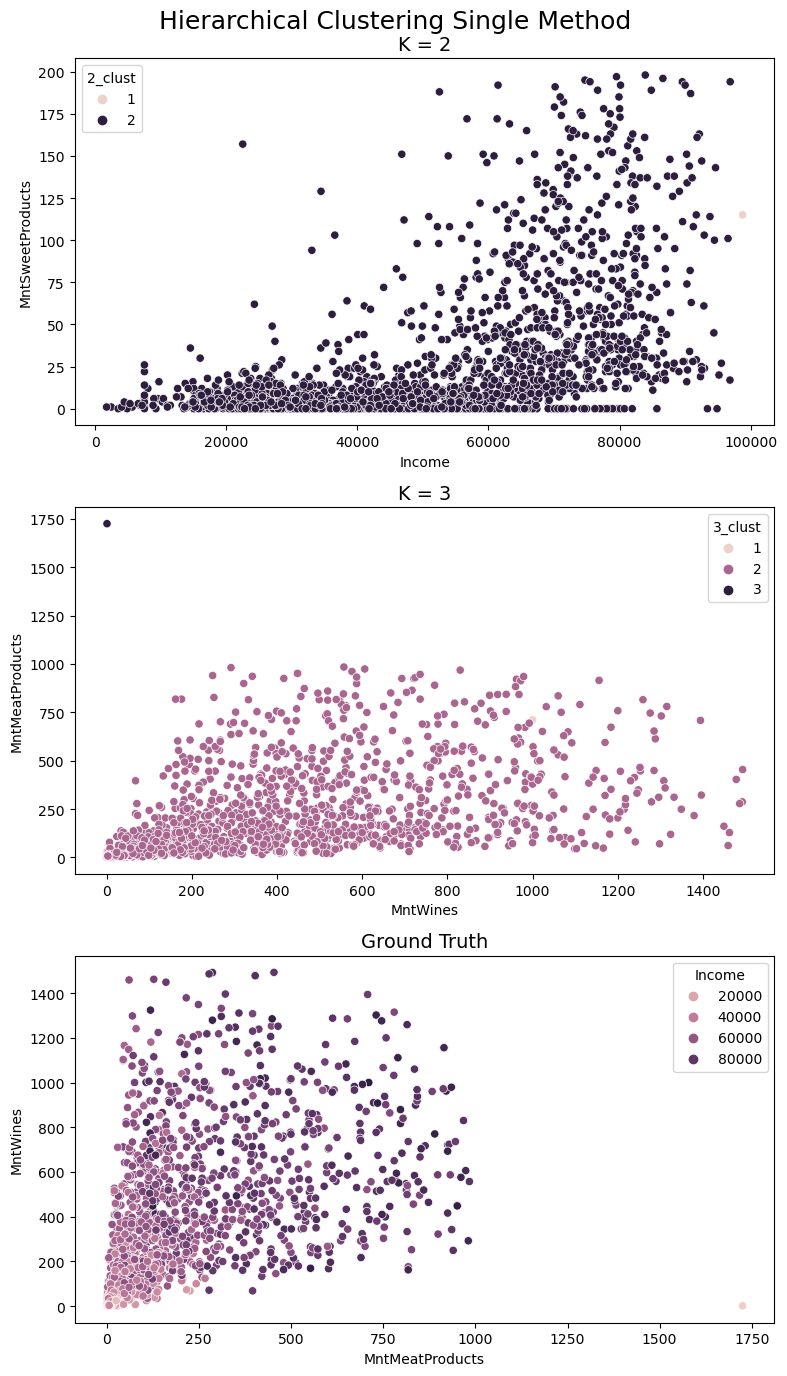

In [48]:
plt.figure(figsize=(8,14))

plt.suptitle("Hierarchical Clustering Single Method",fontsize=18)

plt.subplot(3,1,1)
plt.title("K = 2",fontsize=14)
sns.scatterplot(x="Income",y="MntSweetProducts", data=X, hue="2_clust")

plt.subplot(3,1,2)
plt.title("K = 3",fontsize=14)
sns.scatterplot(x="MntWines",y="MntMeatProducts", data=X, hue="3_clust")

plt.subplot(3,1,3)
plt.title("Ground Truth",fontsize=14)
sns.scatterplot(x="MntMeatProducts",y="MntWines", data=X, hue="Income")
plt.tight_layout();

In [49]:
s_cluster_2 = metrics.silhouette_score(features, X['2_clust'], metric='euclidean')
s_cluster_3 = metrics.silhouette_score(features, X['3_clust'], metric='euclidean')

print(f'Silhouette Coefficient for the data Dataset Clusters: {s_cluster_2:.2f}')
print(f'Silhouette Coefficient for the data Dataset Clusters: {s_cluster_3:.2f}')


Silhouette Coefficient for the data Dataset Clusters: 0.39
Silhouette Coefficient for the data Dataset Clusters: 0.17


Не вбачаю кластеризацію вдалою за цим розподілом, можливо потрібно зменшити к-ть ознак на моменті аналізу і розбивати кластери бульш ціленаправлено і в такому випадку ми отримаємо кращі результати
Видимо, перехід від 2 кластерів до 3 не має значення, і явного розбиття немає

**Завдання 10.**
1. Використайте метод кластеризації, який ми не використовували в попередніх завданнях цього ДЗ (може бути ієрархічна кластеризація з іншим способом звʼязності або інші методи sklearn).
2. Порахуйте мер=трику силуету і візуалізуйте результат кластеризації. Зробіть висновок про те, чи могла б ця кластеризація бути корисною?

Спробую метод DBSCAN, з маштабованими ознаками

In [50]:
dbscan = DBSCAN(eps=0.5, min_samples=9)
#dbscan.fit(X)
X['DBSCAN_Cluster'] = dbscan.fit_predict(scaled_features)
labels_dbs = dbscan.labels_
print(labels_dbs)

[-1 -1 -1 ... -1 -1 -1]


In [51]:
n_clusters_ = len(set(labels_dbs)) - (1 if -1 in labels_dbs else 0)

In [52]:
n_noise_ = list(labels_dbs).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

Estimated number of clusters: 5
Estimated number of noise points: 1743


In [53]:
s_dbs = metrics.silhouette_score(X, dbscan.labels_)
print(f'Silhouette Coefficient for the data Dataset Clusters: {s_dbs:.2f}')

Silhouette Coefficient for the data Dataset Clusters: -0.05


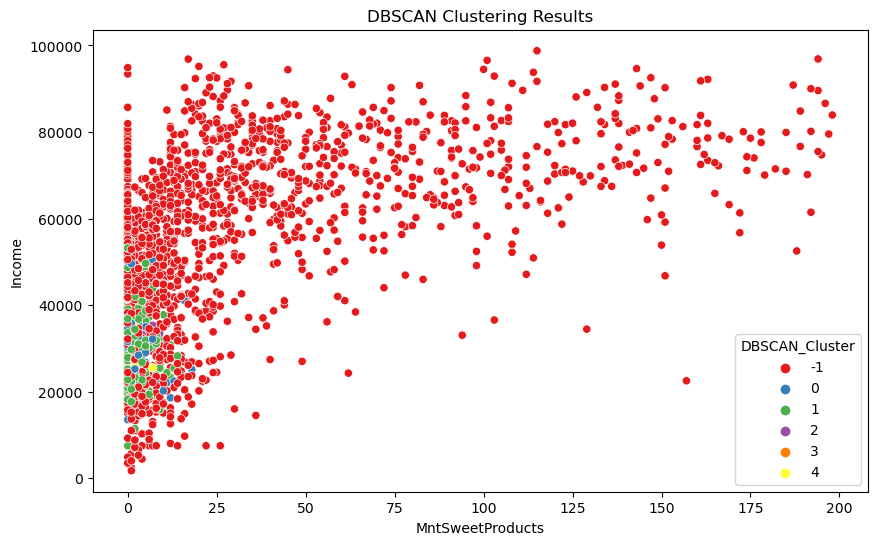

In [54]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=features['MntSweetProducts'], y=features['Income'], hue=X['DBSCAN_Cluster'], palette='Set1', legend='full')
plt.title('DBSCAN Clustering Results')
plt.xlabel('MntSweetProducts')
plt.ylabel('Income')
plt.show()


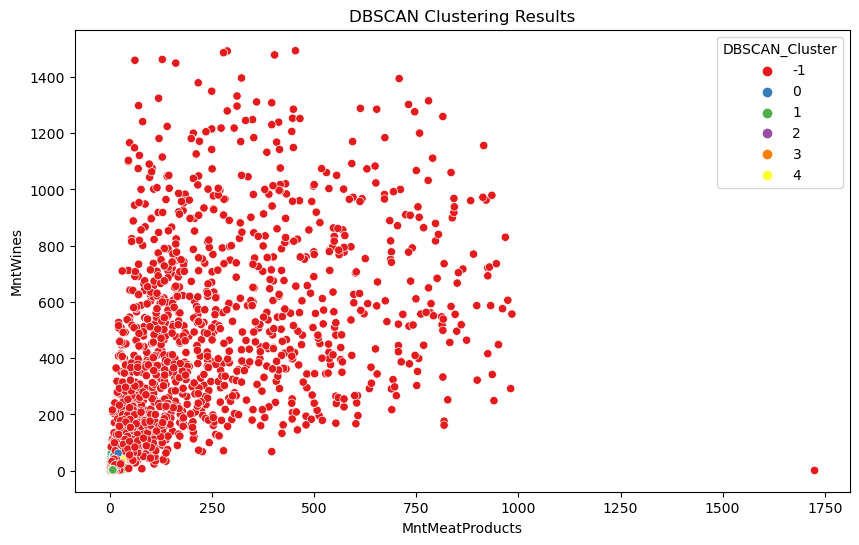

In [134]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=features['MntMeatProducts'], y=features['MntWines'], hue=X['DBSCAN_Cluster'], palette='Set1', legend='full')
plt.title('DBSCAN Clustering Results')
plt.xlabel('MntMeatProducts')
plt.ylabel('MntWines')
plt.show()

Висновок для общирної задачі не бачу результатів з цим дата сетом не бачу значимих результатів , думаю буде корисно точечно вибрати кластери по матриці кореляції і потім доавтматизувати кожен точечний випадок , але в цілому сама ідея кластеризації виглядає корисною